In [62]:
import network
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import cv2

from time import time

In [63]:
state_dict = torch.load(r"C:\Users\lpott\Downloads\model_best.pth.tar",map_location='cpu')['state_dict']

In [64]:
model = network.resnet101(pretrained=True,channel=3)
model.load_state_dict(state_dict)
labels = pd.read_csv(r'C:\Users\lpott\Desktop\capstone\two-stream-action-recognition\UCF_list\classInd.txt', sep=" ", header=None).drop(0,axis=1).values

In [65]:
# set(model.state_dict().keys()).difference(state_dict.keys())

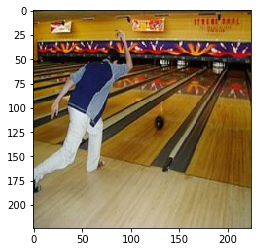

torch.Size([1, 3, 224, 224])


In [66]:
# hammer
# eye makeup
# skii
# drum
# juggling
# sumo
# guitar
im = plt.imread(r"C:\Users\lpott\Downloads\bowling.jpg")
im_res = cv2.resize(im,dsize=(224,224),interpolation=cv2.INTER_CUBIC)
plt.imshow(im_res)
plt.show()
image = torch.FloatTensor(im_res).permute(2,0,1).unsqueeze(0)/255
print(image.size())

In [67]:
model.eval()
labels[model.forward(image).argmax()][0]

'Bowling'

Time to resize image 0.000998
tensor([0.1028], grad_fn=<MaxBackward0>)


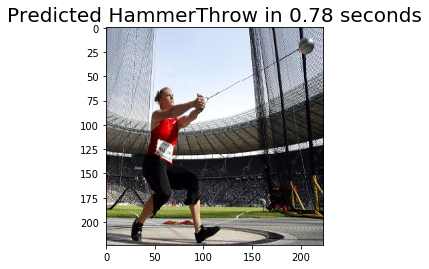

Time to resize image 0.000000
tensor([0.4139], grad_fn=<MaxBackward0>)


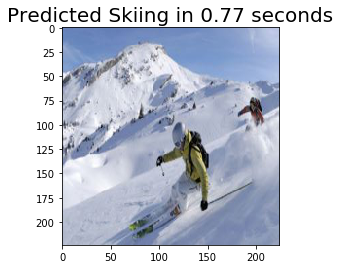

Time to resize image 0.001995
tensor([0.1004], grad_fn=<MaxBackward0>)


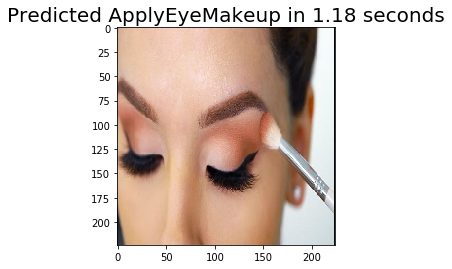

Time to resize image 0.000000
tensor([0.1275], grad_fn=<MaxBackward0>)


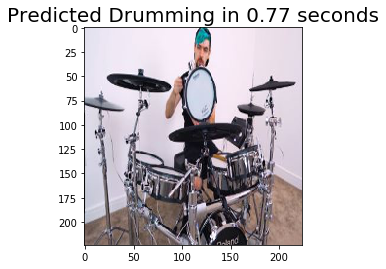

Time to resize image 0.000996
tensor([0.0743], grad_fn=<MaxBackward0>)


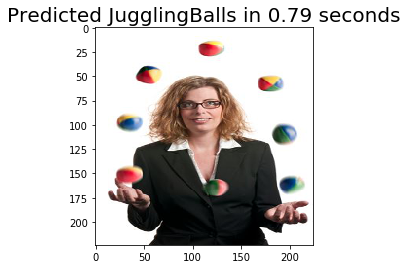

Time to resize image 0.000000
tensor([0.0978], grad_fn=<MaxBackward0>)


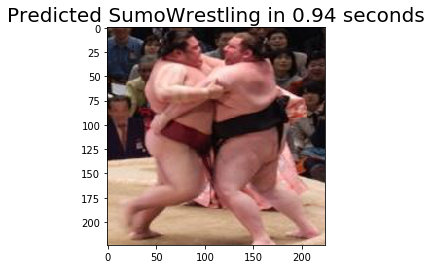

Time to resize image 0.000998
tensor([0.3377], grad_fn=<MaxBackward0>)


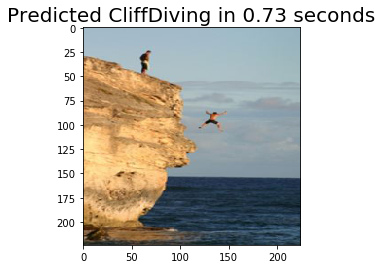

Time to resize image 0.000997
tensor([0.0846], grad_fn=<MaxBackward0>)


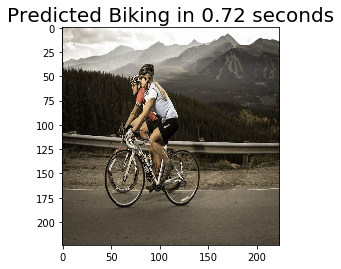

Time to resize image 0.000997
tensor([0.2692], grad_fn=<MaxBackward0>)


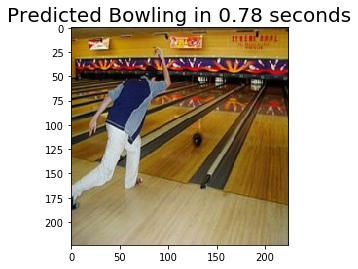

Time to resize image 0.000000
tensor([0.2111], grad_fn=<MaxBackward0>)


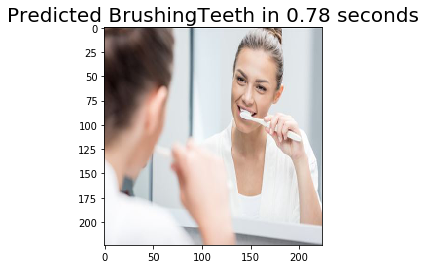

In [83]:
# iterate through images
images = ["hammer","ski","makeup","drum","juggling","sumo","cliffdiving","biking","bowling","teehts"]
model.eval()
for typ in images:
    im = plt.imread(os.path.join(r"C:\Users\lpott\Downloads",typ+".jpg"))
    t_start = time()
    im  = cv2.resize(im,dsize=(224,224),interpolation=cv2.INTER_CUBIC)
    t_end = time()
    total_time = t_end - t_start
    print("Time to resize image {:f}".format(total_time))
    
    plt.imshow(im)
    im = torch.FloatTensor(im).permute(2,0,1).unsqueeze(0)/255
    
    t_start = time()
    value,index = F.softmax(model.forward(im),dim=1).max(1)
    print(value)
    label = labels[index].item()
    t_end = time()
    total_time = t_end - t_start
    
    plt.title("Predicted "+label+" in {:0.2f} seconds".format(total_time),fontsize=20)
    plt.show()

## Live camera feed

In [69]:
violet= np.zeros((50, 224, 3), np.uint8)
violet[:] = (255, 0, 180) 

In [70]:
import torch.nn.functional as F

In [75]:
value > .0

tensor([0.0450], grad_fn=<MaxBackward0>)

In [79]:
cap = cv2.VideoCapture(0)

while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()
    
    im_dis  = cv2.resize(frame,dsize=(224,224),interpolation=cv2.INTER_CUBIC)
    im = torch.FloatTensor(im_dis).permute(2,0,1).unsqueeze(0)/255
    value,index = F.softmax(model.forward(im),dim=1).max(1)
    print(labels[index])
    if value > .1:
        label = labels[index].item()
    else:
        label = "No Action"

    vcat = cv2.vconcat((violet,im_dis))
    
    font = cv2.FONT_ITALIC
    cv2.putText(vcat,label,(20,20), font, .5,(0,0,0), 3, 0)
    cv2.imshow('Text', vcat)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

['WritingOnBoard']
['ApplyEyeMakeup']
['ApplyEyeMakeup']
['ApplyEyeMakeup']
['ApplyEyeMakeup']
['ApplyEyeMakeup']
['WritingOnBoard']
['ShavingBeard']
['SkyDiving']
['ShavingBeard']
['BrushingTeeth']
['BrushingTeeth']
['ShavingBeard']
['ShavingBeard']
['ShavingBeard']
['ShavingBeard']
['ShavingBeard']
['ApplyEyeMakeup']
['ShavingBeard']
['ApplyEyeMakeup']
['ApplyEyeMakeup']
['ApplyEyeMakeup']
['ApplyEyeMakeup']
['ShavingBeard']
['ShavingBeard']
['ShavingBeard']
['ShavingBeard']
['BrushingTeeth']
['SkyDiving']
['SkyDiving']
['SkyDiving']
['SkyDiving']
['SkyDiving']
['SkyDiving']
['SkyDiving']
['SkyDiving']
['SkyDiving']
['SkyDiving']
['SkyDiving']
['SkyDiving']
['SkyDiving']
['ShavingBeard']
['ShavingBeard']
['ShavingBeard']
['ShavingBeard']
['ShavingBeard']
['ShavingBeard']
['ShavingBeard']
['ShavingBeard']
['CliffDiving']
['ApplyEyeMakeup']
['ApplyEyeMakeup']
['WritingOnBoard']
['CliffDiving']
['ApplyEyeMakeup']
['ApplyEyeMakeup']


### Want to see RGB Difference

In [20]:
from collections import deque
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [21]:
cap = cv2.VideoCapture(0)

buffer = deque(maxlen=100)

while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()
    cv2.imshow('Frame',frame)
    buffer.append(frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

KeyboardInterrupt: 

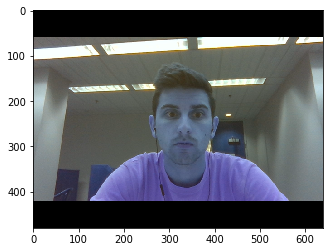

In [51]:
plt.imshow(buffer[0])
plt.show()

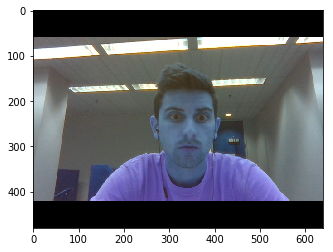

In [52]:
plt.imshow(buffer[20])
plt.show()

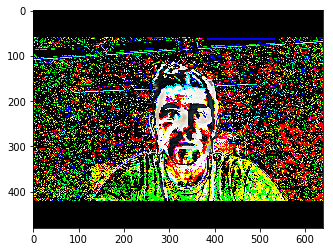

In [53]:
plt.imshow(buffer[20]-buffer[0])
plt.show()